In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import japanize_matplotlib

In [21]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    start = None
    end = None
    for data in df.iterrows():
        norm = data[1]['norm']
        if norm > 9.5 and norm < 10.1:
            if not start:
                start = data[1]['time']
            end = data[1]['time']
        else:
            plt.axvspan(start, end, color='gray', alpha=0.2)
            start = None
            end = None

    plt.legend()

    plt.show()


In [11]:
file_path = "./logs/walk/"
df_mag = pd.read_csv(
    f"{file_path}Magnetometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)


In [12]:
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

In [13]:
df_gyro['x_rotate'] = np.cumsum(df_gyro['x']) / 400
df_gyro['y_rotate'] = np.cumsum(df_gyro['y']) / 400
df_gyro['z_rotate'] = np.cumsum(df_gyro['z']) / 400

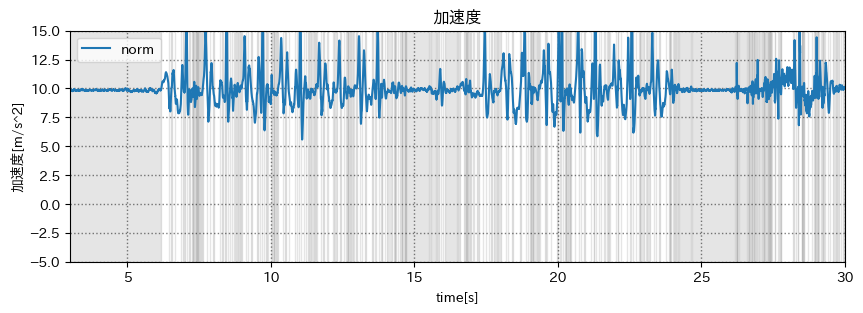

In [22]:
plot(
    df_acc,
    heads=[
        ("time", "norm"),
    ],
    title="加速度",
    xlabel="time[s]",
    ylabel="加速度[m/s^2]",
    xlim=(3, 30),
    ylim=(-5, 15),
    grid=True,
)


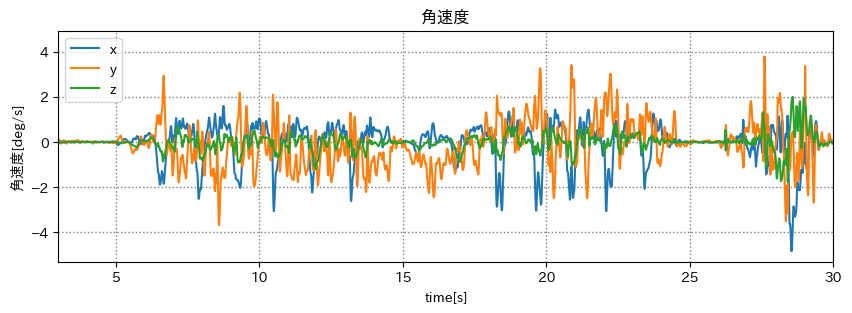

In [15]:
plot(
    df_gyro,
    heads=[
        ('time', 'x'),
        ('time', 'y'),
        ('time', 'z'),
    ],
    title="角速度",
    xlabel="time[s]",
    ylabel="角速度[deg/s]",
    xlim=(3, 30),
)


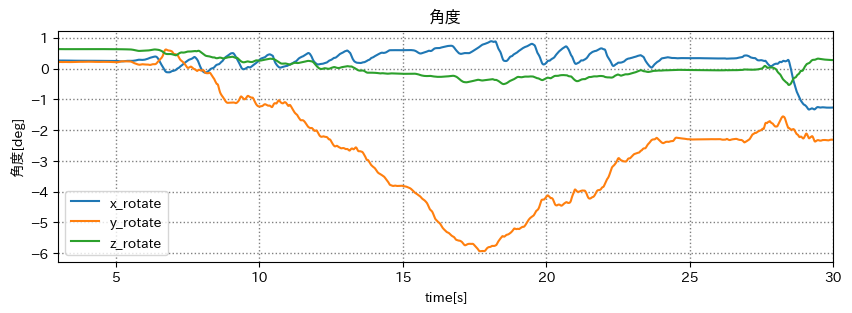

In [17]:
plot(
    df_gyro,
    heads=[
        ('time', 'x_rotate'),
        ('time', 'y_rotate'),
        ('time', 'z_rotate'),
    ],
    title="角度",
    xlabel="time[s]",
    ylabel="角度[deg]",
    xlim=(3, 30),
)
